# Credit Card Fraud Detection Using Machine Learning
Detecting credit card fraud involves using machine learning techniques to analyze transactional data and classify whether a transaction is fraudulent or not. Below is a step-by-step process and code to implement this.

## Process Explanation

* Understand the Dataset:
Use a dataset with features representing transactional data and a label indicating fraud (1) or non-fraud (0).
Example dataset: Kaggle - Credit Card Fraud Detection.

* Preprocessing:
Handle class imbalance (fraudulent transactions are rare).
Normalize/scale features for better model performance.

* Train-Test Split:
Split the data into training and testing datasets.

* Model Selection:
Use a classification model such as Logistic Regression, Random Forest, or XGBoost.

* Evaluation:
Evaluate using metrics like accuracy, precision, recall, and the F1 score.
Use a confusion matrix to assess model performance on imbalanced datasets.

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
import seaborn as sns

In [11]:
df = pd.read_csv('/Users/kaosarahmed/Documents/Data Analysis/Credit Card Fraud Detection Using Machine Learning/creditcard.csv')

In [12]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [13]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [14]:
pd.options.display.max_columns = None # To show all columns

In [15]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [16]:
df.shape

(284807, 31)

In [17]:
print('Number of Columns: {}'. format(df.shape[1]))
print('Number of Rows: {}'. format(df.shape[0]))

Number of Columns: 31
Number of Rows: 284807


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [19]:
df.isnull().sum() #Checking the null values

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## Why I Choose the Credit Card Fraud Detection Dataset?
The credit card fraud detection dataset is an excellent choice for building a data science project due to several reasons:

### Choosing this dataset allows you to showcase:

* Real-world problem-solving.
* Handling imbalanced datasets.
* Expertise in machine learning and evaluation metrics.
* Applicability of skills in the financial and banking sectors.
* 
This project not only builds technical skills but also demonstrates your understanding of business value, making it a standout addition to my portfolio

## Why Scale the Amount Column?
* Normalization of Features:

* The Amount column represents monetary values and typically has a wide range of values (e.g., $1 to thousands of dollars).
Other features (V1, V2, ..., V28) in the dataset are already PCA-transformed and centered around zero with a small range of values.

* Without scaling, the Amount column could dominate the model due to its larger range, leading to biased results.
Improving Model Convergence:

* Many machine learning algorithms (e.g., logistic regression, SVM, neural networks) are sensitive to the scale of input features.

* Scaling helps models converge faster during training and can improve overall performance.
Uniform Contribution:

By scaling, I can ensure that the Amount column contributes equally to the predictions as the other features, avoiding disproportionate influence.

## When to Scale?
* Before Training: Always scale features as part of preprocessing, right after splitting the dataset into training and testing sets.

### Scaler Choice:
* StandardScaler: Useful for standardization (mean = 0, standard deviation = 1), commonly used for algorithms that assume a Gaussian distribution.
* MinMaxScaler: Scales data to a range (e.g., 0 to 1) and is useful for algorithms like neural networks.


In [22]:
from sklearn.preprocessing import StandardScaler


In [37]:
sc = StandardScaler()
df['Amount'] = sc.fit_transform(pd.DataFrame(df['Amount']))

In [39]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [42]:
df = df.drop(['Time'], axis = 1)

In [44]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


* To check for duplicate values in a dataset, we can use the .duplicated() method in pandas. Here’s how to check for duplicates in the credit card fraud detection dataset:

In [46]:
df.duplicated().any()

True

In [54]:
df.duplicated().sum()

9144

In [56]:
df = df.drop_duplicates()

In [58]:
df.shape

(275663, 30)

## Check Class Imbalance

To check for imbalance in a dataset, We typically examine the distribution of the target variable (e.g., the "Class" column in the credit card fraud detection dataset). Here's how we can do it:

In [62]:
df['Class'].value_counts()

Class
0    275190
1       473
Name: count, dtype: int64

Class distribution:
Class
0    275190
1       473
Name: count, dtype: int64

Class percentage distribution:
Class
0    99.828414
1     0.171586
Name: proportion, dtype: float64


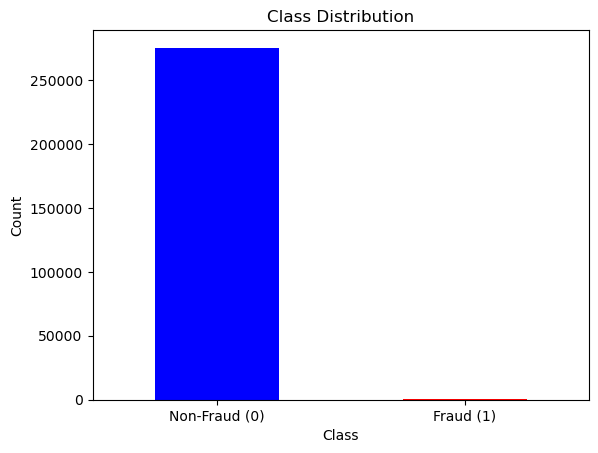

In [64]:

# Check the distribution of the target variable
class_distribution = df['Class'].value_counts()

print("Class distribution:")
print(class_distribution)

# Calculate the percentage distribution
class_percentage = df['Class'].value_counts(normalize=True) * 100

print("\nClass percentage distribution:")
print(class_percentage)

# Visualize the imbalance
import matplotlib.pyplot as plt

class_distribution.plot(kind='bar', color=['blue', 'red'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Non-Fraud (0)', 'Fraud (1)'], rotation=0)
plt.show()


It shows that higly imbalance data set

## Splitting Dataset

### train_test_split Parameters:

* X: Feature set (all columns except the target).
* y: Target variable (Class in this case).
* test_size=0.2: Allocates 20% of the data for testing and 80% for training.
* random_state=42: Ensures reproducibility of results.
* stratify=y: Ensures the proportion of fraud and non-fraud cases is maintained in both training and testing sets.

In [70]:
X = df.drop('Class', axis = 1)
y = df['Class']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Handle Imbalanced Datasets
* In cases like credit card fraud detection, where fraudulent transactions are rare, accuracy can be misleading (e.g., predicting "non-fraud" for all instances would give high accuracy but miss all fraud cases).
* Metrics like precision, recall, and F1 score are better suited to evaluate performance on imbalanced datasets.

### A dictionary Classifier is created where:
* Keys are the names of the classifiers ('Logistic Regression', 'Decision Tree Classifier').
* Values are instances of the corresponding classifiers (LogisticRegression() and DecisionTreeClassifier()).

### The for loop iterates over the dictionary:
* name: The name of the classifier (e.g., 'Logistic Regression').
* clf: The classifier object (e.g., LogisticRegression()).

* Prints a header for each classifier to distinguish its results.

In [78]:
Classifier = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree Classifier': DecisionTreeClassifier()
}

for name, clf in Classifier.items():
    print(f"\======={name}=======")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"\n Accuracy : {accuracy_score(y_test, y_pred)}")
    print(f"\n Precision : {precision_score(y_test, y_pred)}")
    print(f"\n Recall : {recall_score(y_test, y_pred)}")
    print(f"\n F1 Score : {f1_score(y_test, y_pred)}")    

<>:7: SyntaxWarning: invalid escape sequence '\='
<>:7: SyntaxWarning: invalid escape sequence '\='
/var/folders/x5/q2mtrpyd1g5d_qn33yggj7y40000gn/T/ipykernel_1243/3091901080.py:7: SyntaxWarning: invalid escape sequence '\='
  print(f"\======={name}=======")


\=======Logistic Regression=======

 Accuracy : 0.9992563437505668

 Precision : 0.890625

 Recall : 0.6263736263736264

 F1 Score : 0.7354838709677419
\=======Decision Tree Classifier=======

 Accuracy : 0.9989298605191084

 Precision : 0.6666666666666666

 Recall : 0.7032967032967034

 F1 Score : 0.6844919786096256


### Calculates and prints the following evaluation metrics:
* Accuracy: The proportion of correct predictions out of all predictions.
* Precision: The proportion of true positive predictions out of all positive predictions.
* Recall: The proportion of true positive predictions out of all actual positives.
* F1 Score: The harmonic mean of precision and recall.

## Undersampling the Majority Class
* Reduces the size of the majority class by removing some instances.
* Useful when the dataset is large, but it may result in losing valuable data.

In [85]:
normal = df[df['Class']==0]
fraud = df[df['Class']==1]

In [87]:
normal.shape

(275190, 30)

In [89]:
fraud.shape

(473, 30)

In [95]:
normal_sample = normal.sample(n = 473)

In [97]:
normal_sample.shape

(473, 30)

In [103]:
new_df = pd.concat([normal_sample, fraud], ignore_index = True)

In [105]:
new_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,2.038552,0.181143,-1.845811,0.636579,0.532613,-0.638957,0.109594,-0.230747,0.628839,-0.725029,-0.444032,0.710861,1.126434,-1.966863,-0.462440,0.060652,1.154695,0.009334,-0.143085,-0.070156,-0.024726,0.273913,0.046953,0.567931,0.153321,0.611084,-0.034791,-0.021816,-0.325283,0
1,-2.753389,-0.525593,0.531435,1.380020,-0.903942,-0.071588,-0.099976,0.966364,-0.719864,-0.370219,0.504297,0.440595,-0.254636,0.998771,0.836125,0.771993,-0.369910,1.251402,0.543135,0.307708,0.368497,0.432378,-0.302330,0.035843,-0.048487,-0.254192,0.140337,-0.250703,0.566330,0
2,1.903655,-1.145761,-1.667435,-0.910355,-0.304818,-0.560610,-0.122540,-0.221635,-0.829871,0.881326,1.082800,0.347423,0.214867,0.177433,-0.965105,0.745891,0.193442,-1.429797,0.997214,0.283891,0.199477,0.238327,0.067860,0.733351,-0.035467,-0.305102,-0.074652,-0.043064,0.270472,0
3,1.950658,-0.537404,-0.242282,0.374776,-0.873818,-0.354543,-0.807304,0.143305,1.083520,0.242421,0.696257,0.412329,-1.105803,0.255801,0.010400,0.532974,-0.643068,0.616326,-0.166244,-0.275683,0.293667,0.982426,0.141735,0.053960,-0.310386,0.627010,-0.031018,-0.062212,-0.341275,0
4,2.315674,-1.389413,-0.845852,-1.644455,-1.139027,-0.232851,-1.315687,-0.088679,-1.052065,1.537444,-1.241971,-0.790599,0.715268,-0.611897,0.020469,-0.391206,0.349736,0.032880,-0.159846,-0.407060,-0.166877,0.050081,0.267743,0.397361,-0.228512,-0.187450,0.027118,-0.041987,-0.320445,0


In [107]:
new_df.shape

(946, 30)

In [111]:
new_df['Class'].value_counts()

Class
0    473
1    473
Name: count, dtype: int64

In [113]:
X = new_df.drop('Class', axis = 1)
y = new_df['Class']

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [117]:
Classifier = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree Classifier': DecisionTreeClassifier()
}

for name, clf in Classifier.items():
    print(f"\======={name}=======")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"\n Accuracy : {accuracy_score(y_test, y_pred)}")
    print(f"\n Precision : {precision_score(y_test, y_pred)}")
    print(f"\n Recall : {recall_score(y_test, y_pred)}")
    print(f"\n F1 Score : {f1_score(y_test, y_pred)}")    

\=======Logistic Regression=======

 Accuracy : 0.9473684210526315

 Precision : 0.9893617021276596

 Recall : 0.9117647058823529

 F1 Score : 0.9489795918367347
\=======Decision Tree Classifier=======

 Accuracy : 0.8947368421052632

 Precision : 0.9019607843137255

 Recall : 0.9019607843137255

 F1 Score : 0.9019607843137255


<>:7: SyntaxWarning: invalid escape sequence '\='
<>:7: SyntaxWarning: invalid escape sequence '\='
/var/folders/x5/q2mtrpyd1g5d_qn33yggj7y40000gn/T/ipykernel_1243/3091901080.py:7: SyntaxWarning: invalid escape sequence '\='
  print(f"\======={name}=======")


### Summary and Drawback
After applying undersampling to balance the dataset, the performance of Logistic Regression and Decision Tree Classifier was evaluated.

* Logistic Regression achieved higher accuracy (94.74%), precision (98.94%), and F1 score (94.90%), making it the stronger model overall.
* Decision Tree Classifier delivered solid performance with a balanced recall (90.20%), making it effective for detecting fraudulent cases.

### Drawback of Undersampling:
* While undersampling balances the dataset, it removes a significant portion of the majority class, potentially leading to loss of important information. This could limit the model’s ability to generalize to unseen data in real-world scenarios where fraud is rare. 
* Alternative techniques like SMOTE (Synthetic Minority Oversampling Technique) or ensemble methods should also be explored to address this issue.

## Oversampling the Minority Class
* Since the dataset has very few minority instances, oversampling (e.g., SMOTE) can help balance the data by generating synthetic examples of the minority class.

In [121]:
X = df.drop('Class', axis = 1)
y = df['Class']

In [123]:
X.shape

(275663, 29)

In [125]:
y.shape

(275663,)

In [127]:
from imblearn.over_sampling import SMOTE

In [133]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [135]:
y_resampled.value_counts()

Class
0    275190
1    275190
Name: count, dtype: int64

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [141]:
Classifier = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree Classifier': DecisionTreeClassifier()
}

for name, clf in Classifier.items():
    print(f"\======={name}=======")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"\n Accuracy : {accuracy_score(y_test, y_pred)}")
    print(f"\n Precision : {precision_score(y_test, y_pred)}")
    print(f"\n Recall : {recall_score(y_test, y_pred)}")
    print(f"\n F1 Score : {f1_score(y_test, y_pred)}")    

<>:7: SyntaxWarning: invalid escape sequence '\='
<>:7: SyntaxWarning: invalid escape sequence '\='
/var/folders/x5/q2mtrpyd1g5d_qn33yggj7y40000gn/T/ipykernel_1243/3091901080.py:7: SyntaxWarning: invalid escape sequence '\='
  print(f"\======={name}=======")


\=======Logistic Regression=======

 Accuracy : 0.9447200116283295

 Precision : 0.9730215827338129

 Recall : 0.914731923713252

 F1 Score : 0.9429768252570025
\=======Decision Tree Classifier=======

 Accuracy : 0.9982557505723318

 Precision : 0.9975671308484177

 Recall : 0.9989455120629784

 F1 Score : 0.9982558456423394


After applying oversampling, the performance metrics for the models have improved. Here's a brief summary:

### Logistic Regression:

* Accuracy: 94.47%
* Precision: 97.30%
* Recall: 91.47%
* F1 Score: 94.30%

### Decision Tree Classifier:

* Accuracy: 99.83%
* Precision: 99.76%
* Recall: 99.89%
* F1 Score: 99.83%

The Decision Tree Classifier shows a significant improvement in accuracy and recall, making it a highly reliable model for this dataset after oversampling. On the other hand, Logistic Regression also shows a solid performance with a slight trade-off in recall but still maintains a high F1 score.

## Decision Tree model

In [145]:
dtc = DecisionTreeClassifier()
dtc.fit(X_resampled, y_resampled)

DecisionTreeClassifier()

In [146]:
import joblib

In [149]:
joblib.dump(dtc, 'credit_card_model.pk1')

['credit_card_model.pk1']

In [151]:
model = joblib.load('credit_card_model.pk1')

In [157]:
pred = model.predict([[
    0.0, -1.359807134, 1.191857111, -0.074197555, 0.003850368, 0.000595229,
    -0.032188323, 0.001045290, -0.026200123, 0.004229349, 0.006128563, 0.002319968,
    0.005443236, -0.004473073, -0.001743409, -0.000131130, 0.004406177, -0.002138054,
    0.000442868, 0.002348265, -0.000322797, 0.000804261, -0.003193362, -0.001197104,
    0.002481024, -0.003697046, 0.002695209, 0.004445698, 123.0  # Amount (29th feature)
]])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [161]:
pred[0]

0

In [163]:
if pred[0] == 0:
    print('Normal Transaction')
else:
    print('Fraud Transaction')

Normal Transaction


In [167]:
# Flask, streamlit >> 